<a href="https://colab.research.google.com/github/P-drashtiee/-Black-Friday-Sales-Prediction/blob/main/slashmark_intermediate_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/BlackFridaySales.csv")

In [ ]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
data.shape

(69255, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69255 entries, 0 to 69254
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     69255 non-null  int64  
 1   Product_ID                  69255 non-null  object 
 2   Gender                      69255 non-null  object 
 3   Age                         69255 non-null  object 
 4   Occupation                  69255 non-null  int64  
 5   City_Category               69255 non-null  object 
 6   Stay_In_Current_City_Years  69255 non-null  object 
 7   Marital_Status              69255 non-null  int64  
 8   Product_Category_1          69255 non-null  int64  
 9   Product_Category_2          47538 non-null  float64
 10  Product_Category_3          21067 non-null  float64
 11  Purchase                    69254 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 6.3+ MB


In [ ]:
data.isnull().sum()

User_ID                           0
Product_ID                        0
Gender                            0
Age                               0
Occupation                        0
City_Category                     0
Stay_In_Current_City_Years        0
Marital_Status                    0
Product_Category_1                0
Product_Category_2            21717
Product_Category_3            48188
Purchase                          1
dtype: int64

In [ ]:
data.isnull().sum()/data.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.358025
Product_Category_3            69.580536
Purchase                       0.001444
dtype: float64

In [ ]:
data.nunique()

User_ID                        5631
Product_ID                     3201
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               17
Product_Category_3               15
Purchase                      12791
dtype: int64

<ipython-input-9-e1ff3dc92f46>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Purchase"],color='r')


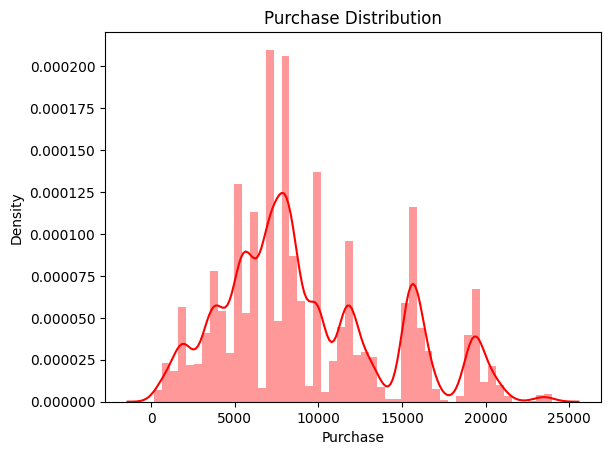

In [ ]:
sns.distplot(data["Purchase"],color='r')
plt.title("Purchase Distribution")
plt.show()

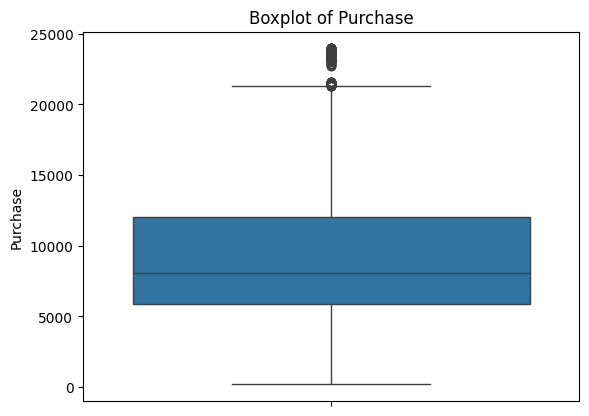

In [ ]:
sns.boxplot(data["Purchase"])
plt.title("Boxplot of Purchase")
plt.show()

In [ ]:
data["Purchase"].skew()

0.6326793210829301

In [ ]:
data["Purchase"].kurtosis()

-0.3230270386980103

In [ ]:
data["Purchase"].describe()

count    69254.000000
mean      9291.211858
std       4962.863532
min        185.000000
25%       5860.000000
50%       8051.000000
75%      12042.000000
max      23958.000000
Name: Purchase, dtype: float64

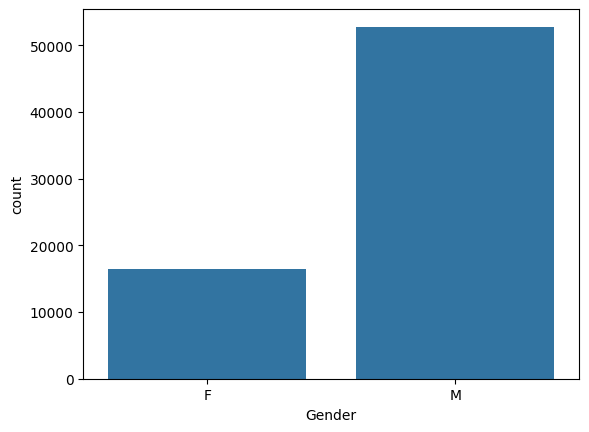

In [ ]:
sns.countplot(x='Gender', data=data)
plt.show()

In [ ]:
data['Gender'].value_counts(normalize=True)*100

M    76.189445
F    23.810555
Name: Gender, dtype: float64

In [ ]:
grouped_data = data.groupby("Gender")["Purchase"].mean()
print(grouped_data)

Gender
F    8757.279884
M    9458.064967
Name: Purchase, dtype: float64


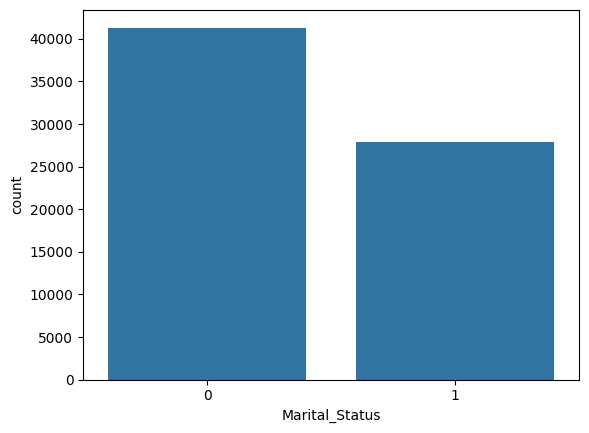

In [ ]:
sns.countplot(x='Marital_Status', data=data)
plt.show()


In [ ]:
grouped_data = data.groupby("Marital_Status")["Purchase"].mean()
print(grouped_data)

Marital_Status
0    9286.952511
1    9297.510398
Name: Purchase, dtype: float64


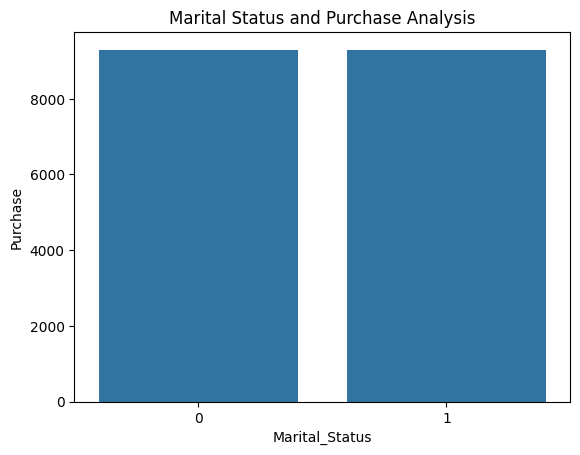

In [ ]:
grouped_data = data.groupby("Marital_Status")["Purchase"].mean()

# Plotting the bar chart
sns.barplot(x=grouped_data.index, y=grouped_data)
plt.title("Marital Status and Purchase Analysis")

plt.show()

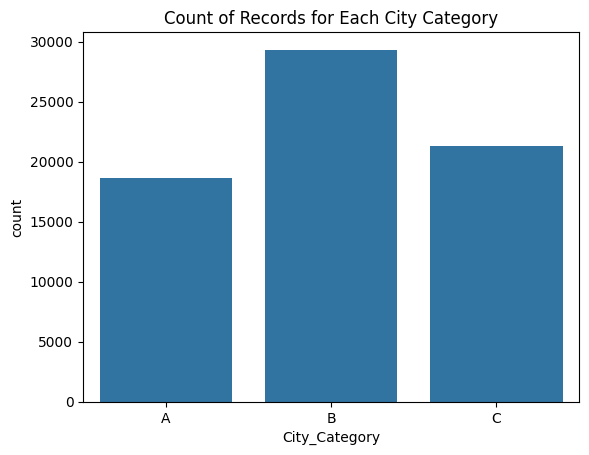

In [ ]:
data['City_Category'] = data['City_Category'].astype('category')
sns.countplot(x='City_Category', data=data)
plt.title("Count of Records for Each City Category")
plt.show()

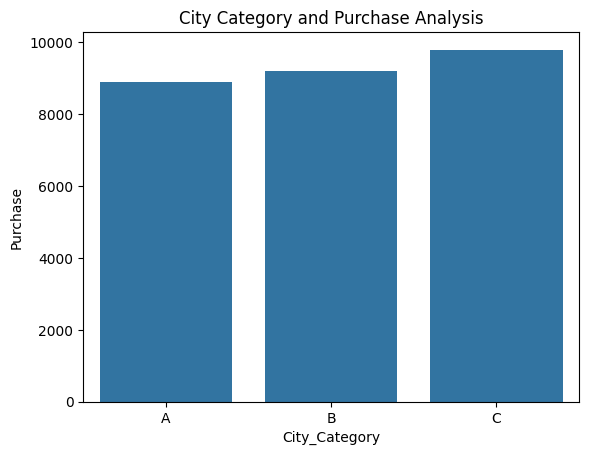

In [ ]:
data['Purchase'] = pd.to_numeric(data['Purchase'], errors='coerce')  # 'coerce' option converts non-numeric values to NaN

# Group by 'City_Category' and calculate the mean of 'Purchase'
grouped_data = data.groupby("City_Category")["Purchase"].mean()

# Plotting the bar chart
sns.barplot(x=grouped_data.index, y=grouped_data)
plt.title("City Category and Purchase Analysis")

plt.show()

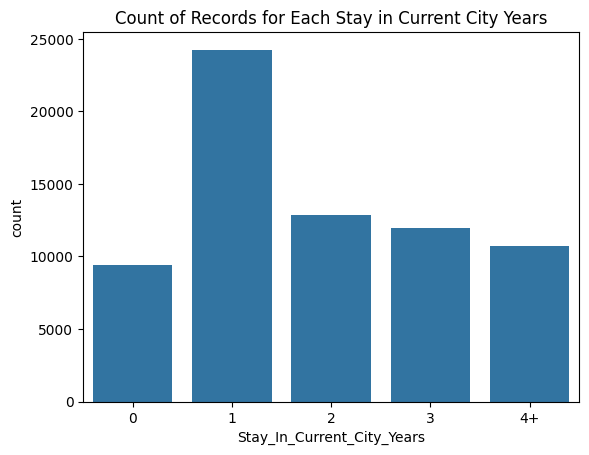

In [ ]:
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].astype('category')

# Check for missing values and handle them if necessary
# data['Stay_In_Current_City_Years'].dropna(inplace=True)  # Uncomment this line if there are missing values

# Create the countplot
sns.countplot(x='Stay_In_Current_City_Years', data=data)
plt.title("Count of Records for Each Stay in Current City Years")
plt.show()


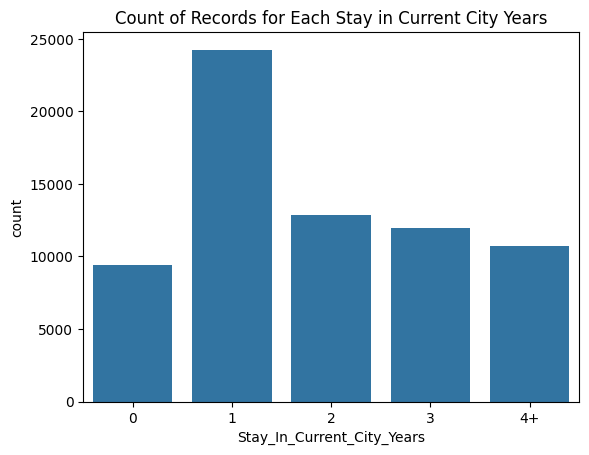

In [ ]:
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].astype('category')

# Check for missing values and handle them if necessary
# data['Stay_In_Current_City_Years'].dropna(inplace=True)  # Uncomment this line if there are missing values

# Create the countplot
sns.countplot(x='Stay_In_Current_City_Years', data=data)
plt.title("Count of Records for Each Stay in Current City Years")
plt.show()

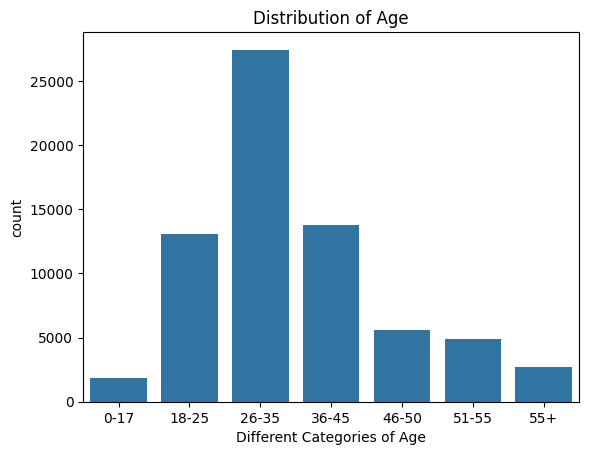

In [ ]:
data['Age'] = data['Age'].astype('category')

# Check for missing values and handle them if necessary
# data['Age'].dropna(inplace=True)  # Uncomment this line if there are missing values

# Create the countplot
sns.countplot(x='Age', data=data)
plt.title("Distribution of Age")
plt.xlabel("Different Categories of Age")
plt.show()

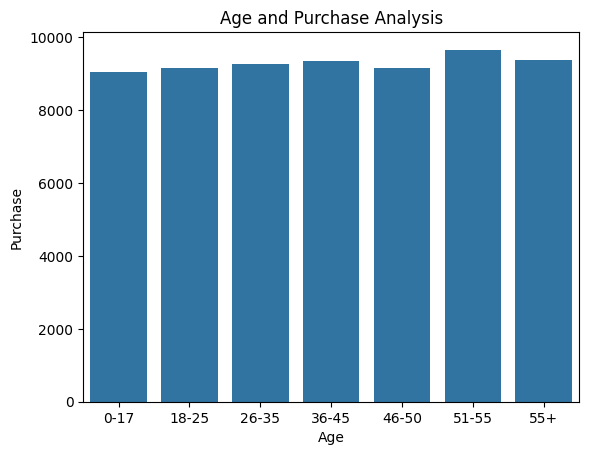

In [ ]:
data['Purchase'] = pd.to_numeric(data['Purchase'], errors='coerce')  # 'coerce' option converts non-numeric values to NaN

# Group by 'Age' and calculate the mean of 'Purchase'
grouped_data = data.groupby("Age")["Purchase"].mean()

# Plotting the bar chart
sns.barplot(x=grouped_data.index, y=grouped_data)
plt.title("Age and Purchase Analysis")

plt.show()

<ipython-input-30-9b7c564ccc55>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("Age").sum()['Purchase'].plot(kind="bar")


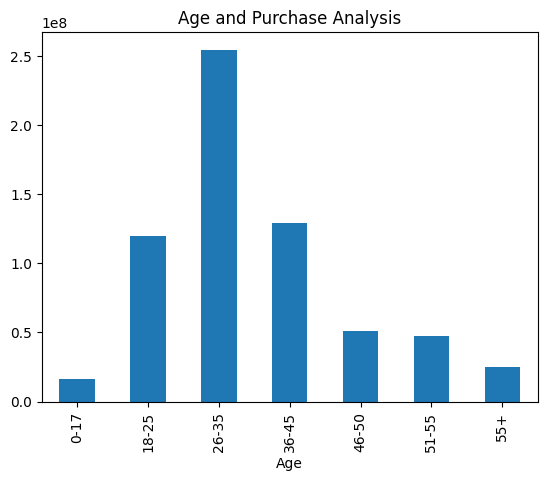

In [ ]:
data.groupby("Age").sum()['Purchase'].plot(kind="bar")
plt.title("Age and Purchase Analysis")
plt.show()

Text(0, 0.5, 'Mean Purchase')

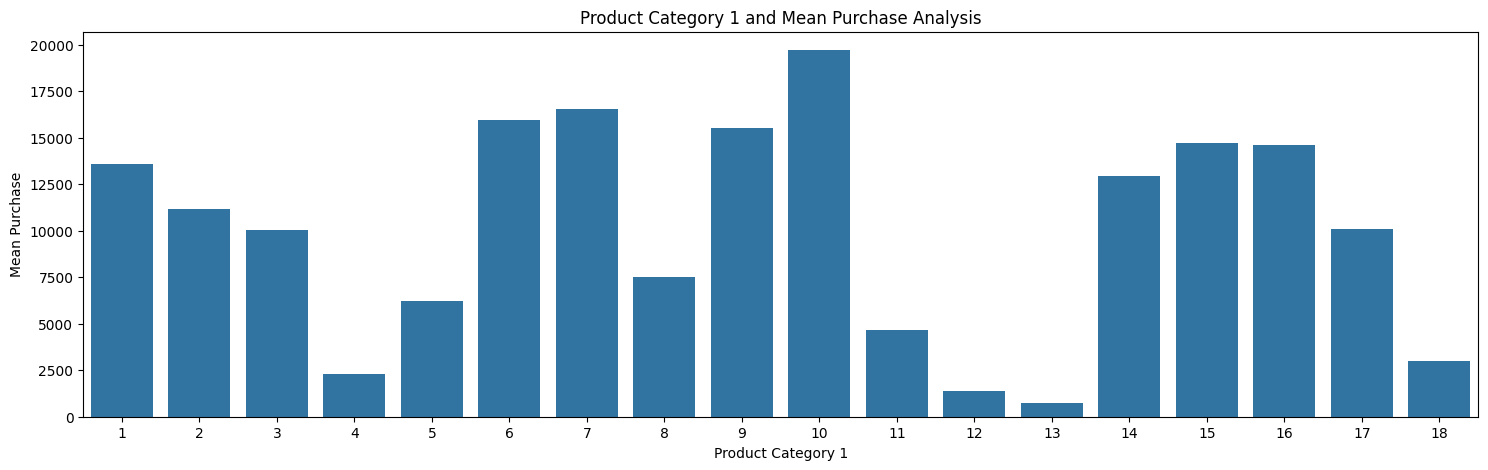

In [ ]:
grouped_data = data.groupby("Product_Category_1")["Purchase"].mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(18, 5))
sns.barplot(x='Product_Category_1', y='Purchase', data=grouped_data)
plt.title("Product Category 1 and Mean Purchase Analysis")
plt.xlabel("Product Category 1")
plt.ylabel("Mean Purchase")

<ipython-input-33-48ef0f049c6f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Product_Category_1').sum()['Purchase'].plot(kind='bar',figsize=(18,5))


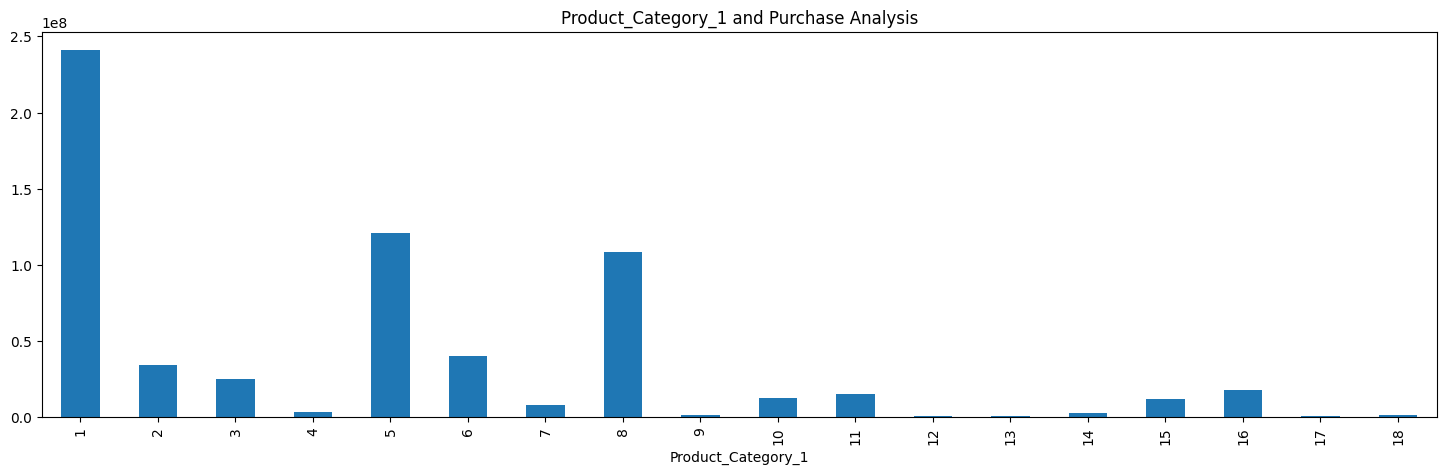

In [ ]:
data.groupby('Product_Category_1').sum()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Analysis")
plt.show()

In [37]:
numeric_data = data.select_dtypes(include=['number'])

# Calculate correlation
correlation_matrix = numeric_data.corr()
correlation_matrix

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.022315,0.004750,0.002786,0.004379,-0.013981,0.005088
Occupation,-0.022315,1.000000,0.023614,-0.004649,0.002135,0.009853,0.015038
Marital_Status,0.004750,0.023614,1.000000,0.015100,0.017175,0.016333,0.001044
Product_Category_1,0.002786,-0.004649,0.015100,1.000000,0.540001,0.230820,-0.319980
Product_Category_2,0.004379,0.002135,0.017175,0.540001,1.000000,0.546613,-0.208864
Product_Category_3,-0.013981,0.009853,0.016333,0.230820,0.546613,1.000000,-0.026466
Purchase,0.005088,0.015038,0.001044,-0.319980,-0.208864,-0.026466,1.000000


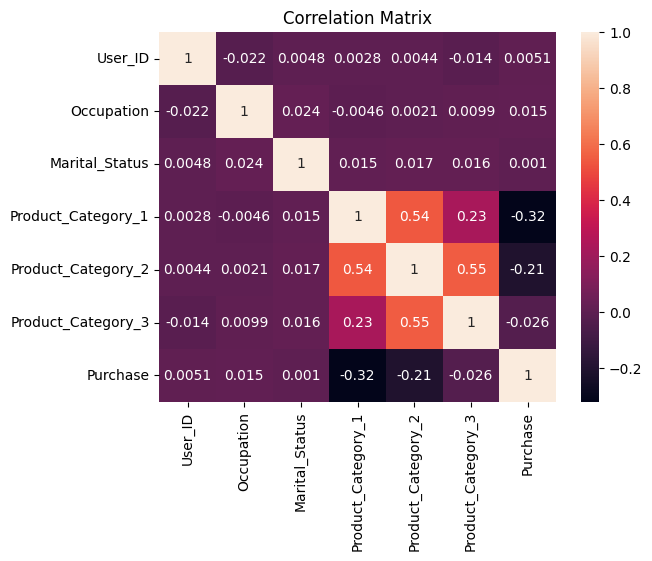

In [38]:
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

In [39]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [40]:
df = data.copy()

In [41]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [42]:
df = pd.get_dummies(df, columns=['Stay_In_Current_City_Years'])

In [43]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [44]:
df['Gender'] = lr.fit_transform(df['Gender'])

In [45]:
df['Age'] = lr.fit_transform(df['Age'])

In [46]:
df['City_Category'] = lr.fit_transform(df['City_Category'])

In [47]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,P00069042,0,0,10,0,0,3,NaN,NaN,8370.0,0,0,1,0,0
1,1000001,P00248942,0,0,10,0,0,1,6.0,14.0,15200.0,0,0,1,0,0
2,1000001,P00087842,0,0,10,0,0,12,NaN,NaN,1422.0,0,0,1,0,0
3,1000001,P00085442,0,0,10,0,0,12,14.0,NaN,1057.0,0,0,1,0,0
4,1000002,P00285442,1,6,16,2,0,8,NaN,NaN,7969.0,0,0,0,0,1


In [48]:
df['Product_Category_2'] =df['Product_Category_2'].fillna(0).astype('int64')
df['Product_Category_3'] =df['Product_Category_3'].fillna(0).astype('int64')

In [49]:
df.isnull().sum()

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Marital_Status                   0
Product_Category_1               0
Product_Category_2               0
Product_Category_3               0
Purchase                         1
Stay_In_Current_City_Years_0     0
Stay_In_Current_City_Years_1     0
Stay_In_Current_City_Years_2     0
Stay_In_Current_City_Years_3     0
Stay_In_Current_City_Years_4+    0
dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69255 entries, 0 to 69254
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   User_ID                        69255 non-null  int64  
 1   Product_ID                     69255 non-null  object 
 2   Gender                         69255 non-null  int64  
 3   Age                            69255 non-null  int64  
 4   Occupation                     69255 non-null  int64  
 5   City_Category                  69255 non-null  int64  
 6   Marital_Status                 69255 non-null  int64  
 7   Product_Category_1             69255 non-null  int64  
 8   Product_Category_2             69255 non-null  int64  
 9   Product_Category_3             69255 non-null  int64  
 10  Purchase                       69254 non-null  float64
 11  Stay_In_Current_City_Years_0   69255 non-null  uint8  
 12  Stay_In_Current_City_Years_1   69255 non-null 

In [51]:
df = df.drop(["User_ID","Product_ID"],axis=1)

In [52]:
X = df.drop("Purchase",axis=1)

In [53]:
y=df['Purchase']

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [57]:
lr.intercept_

9411.36392916314

In [58]:
lr.coef_

array([ 505.0535975 ,  108.78563342,    1.76177069,  321.10439122,
        -42.06282703, -333.6930205 ,   13.85072313,  146.67412521,
          3.38031019,   15.76886148,   28.05749029,  -58.02300086,
         10.81633889])

In [59]:
y_pred = lr.predict(X_test)

In [60]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [64]:
mean_absolute_error(y_test, y_pred)

ValueError: Input contains NaN.

In [67]:
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0)

In [68]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [69]:
dt_y_pred = regressor.predict(X_test)

In [70]:
mean_absolute_error(y_test, dt_y_pred)

ValueError: Input contains NaN.

In [71]:
from sklearn.ensemble import RandomForestRegressor

# create a regressor object
RFregressor = RandomForestRegressor(random_state = 0)

In [72]:
RFregressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, y_test are your training and testing data
# Create and train the Random Forest regressor
RFregressor = RandomForestRegressor()
RFregressor.fit(X_train, y_train)

# Make predictions
rf_y_pred = RFregressor.predict(X_test)

In [74]:
from xgboost.sklearn import XGBRegressor

In [75]:
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.0, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=40, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [76]:
xgb_y_pred = xgb_reg.predict(X_test)

In [77]:
mean_absolute_error(y_test, xgb_y_pred)

ValueError: Input contains NaN.